# Project Description


Detecting Pediatric Acute Lymphoblastic Leukemia using Computer Vision

https://omdena.com/chapter-challenges/detecting-pediatric-acute-lymphoblastic-leukemia-using-computer-vision/

# Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install Required Packages

In [2]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 11.3 MB/s eta 0:00:00


# Imports

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
  

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import sklearn.metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

import optuna




# Load Data - Batch 2

In [4]:
!unzip '/content/drive/MyDrive/omdena_liverpool_all/C-NMC_Leukemia/training_test_pickle/batch_2.zip'

Archive:  /content/drive/MyDrive/omdena_liverpool_all/C-NMC_Leukemia/training_test_pickle/batch_2.zip
  inflating: batch_2/test_data.pickle  
  inflating: batch_2/train_data.pickle  


In [5]:
df_train = pd.read_pickle('./batch_2/train_data.pickle')
df_test = pd.read_pickle('./batch_2/test_data.pickle')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11649 entries, 0 to 11648
Columns: 4609 entries, 0 to label
dtypes: float32(4608), int64(1)
memory usage: 204.9 MB


In [7]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,4599,4600,4601,4602,4603,4604,4605,4606,4607,label
0,0.388562,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.143364,...,0.000000,0.000000,0.0,0.092307,0.000000,0.0,0.0,0.0,0.0,1
1,0.058423,0.0,0.0,0.001344,0.005972,0.0,0.0,0.0,0.0,0.000000,...,0.357052,0.095563,0.0,0.382820,0.000000,0.0,0.0,0.0,0.0,0
2,0.238866,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.375599,0.177851,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0
3,0.547355,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.140675,0.000000,0.0,0.259241,0.003538,0.0,0.0,0.0,0.0,0
4,0.172298,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.476506,0.139199,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1


In [8]:
df_train.shape

(11649, 4609)

In [9]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,4599,4600,4601,4602,4603,4604,4605,4606,4607,label
0,0.117362,0.0,0.0,0.031917,0.086874,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.112116,0.0,0.170777,0.000000,0.0,0.0,0.0,0.0,1
1,0.341701,0.0,0.0,0.064578,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.191021,0.134804,0.0,0.502438,0.109345,0.0,0.0,0.0,0.0,0
2,0.257049,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.102626,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0
3,0.612324,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.135500,0.000000,0.0,0.194919,0.061947,0.0,0.0,0.0,0.0,0
4,0.460807,0.0,0.0,0.183993,0.000000,0.0,0.0,0.145652,0.0,0.0,...,0.426796,0.002291,0.0,0.625358,0.019704,0.0,0.0,0.0,0.0,1


In [10]:
df_test.shape

(2913, 4609)

# Create X and y Data to Feed ML Models

In [11]:
X_train = np.array(df_train.iloc[:,:-1].copy())
y_train = np.array(df_train['label'].copy())

In [12]:
(X_train.shape, y_train.shape)

((11649, 4608), (11649,))

In [13]:
X_test = np.array(df_test.iloc[:,:-1].copy())
y_test = np.array(df_test['label'].copy())

In [14]:
(X_test.shape, y_test.shape)

((2913, 4608), (2913,))

# Classification - Logistic Regression

In [15]:
clf_lreg = LogisticRegression(max_iter=1000000).fit(X_train, y_train)
y_pred = clf_lreg.predict(X_test)

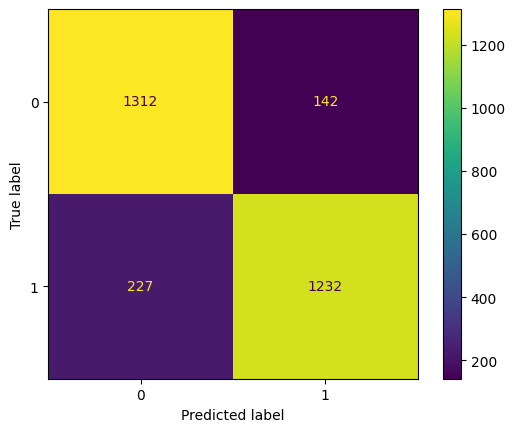

In [16]:
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [17]:
print(classification_report(y_train, clf_lreg.predict(X_train)))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5818
           1       0.95      0.89      0.92      5831

    accuracy                           0.92     11649
   macro avg       0.92      0.92      0.92     11649
weighted avg       0.92      0.92      0.92     11649



In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1454
           1       0.90      0.84      0.87      1459

    accuracy                           0.87      2913
   macro avg       0.87      0.87      0.87      2913
weighted avg       0.87      0.87      0.87      2913



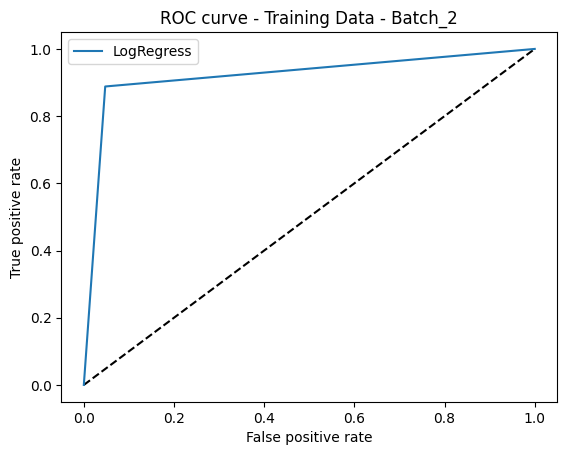

In [19]:
fpr_rf, tpr_rf, _ = roc_curve(y_train, clf_lreg.predict(X_train))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='LogRegress')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Training Data - Batch_2')
plt.legend(loc='best')
plt.show()

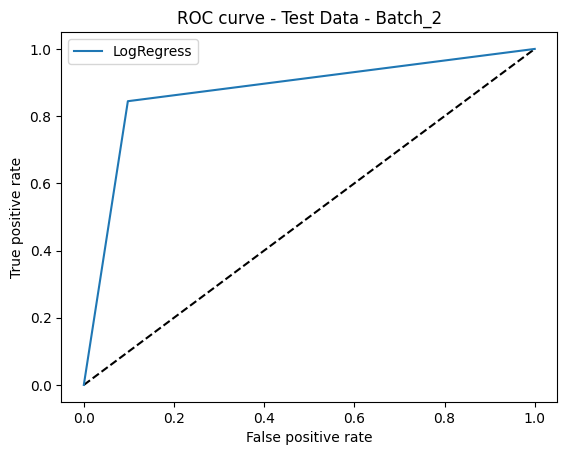

In [20]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, clf_lreg.predict(X_test))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='LogRegress')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Test Data - Batch_2')
plt.legend(loc='best')
plt.show()

# Classification - Random Forest

In [21]:
clf_RF = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [22]:
clf_RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

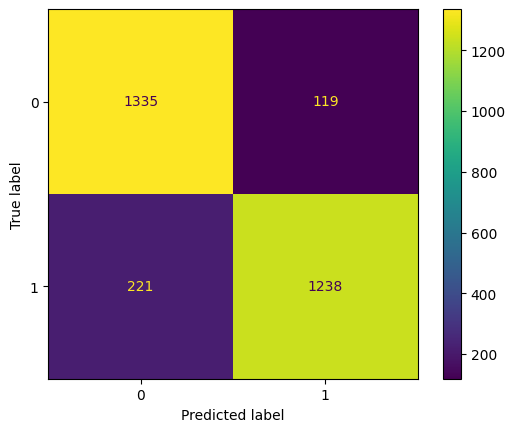

In [23]:
y_pred = clf_RF.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [24]:
print(classification_report(y_train, clf_RF.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5818
           1       1.00      1.00      1.00      5831

    accuracy                           1.00     11649
   macro avg       1.00      1.00      1.00     11649
weighted avg       1.00      1.00      1.00     11649



In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1454
           1       0.91      0.85      0.88      1459

    accuracy                           0.88      2913
   macro avg       0.89      0.88      0.88      2913
weighted avg       0.89      0.88      0.88      2913



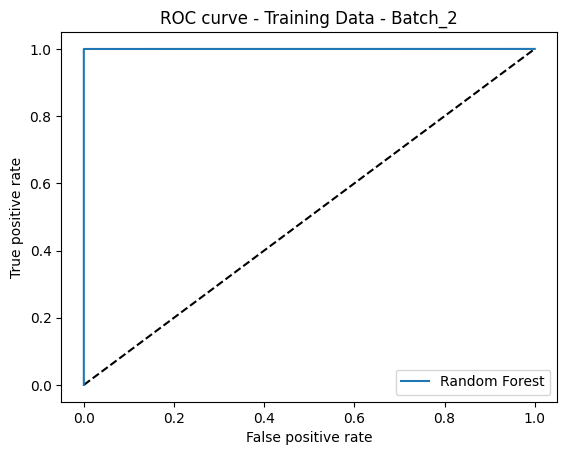

In [26]:
fpr_rf, tpr_rf, _ = roc_curve(y_train, clf_RF.predict(X_train))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Training Data - Batch_2')
plt.legend(loc='best')
plt.show()

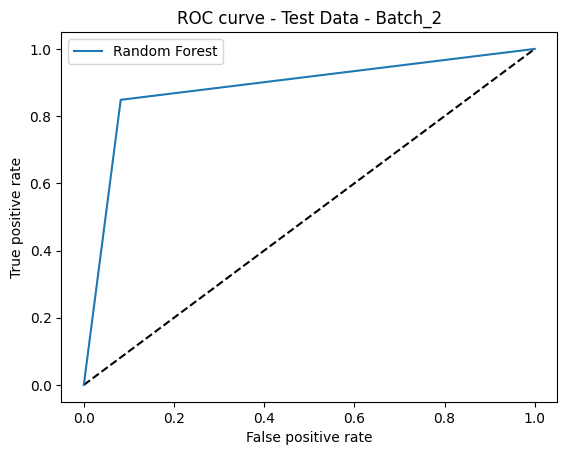

In [27]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, clf_RF.predict(X_test))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Test Data - Batch_2')
plt.legend(loc='best')
plt.show()

# Classification - XGBoost

In [28]:
clf_xgb = XGBClassifier(use_label_encoder=False,eval_metric='logloss',max_depth=50,n_estimators=50,random_state=2023)
clf_xgb.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=50,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=2023, ...)

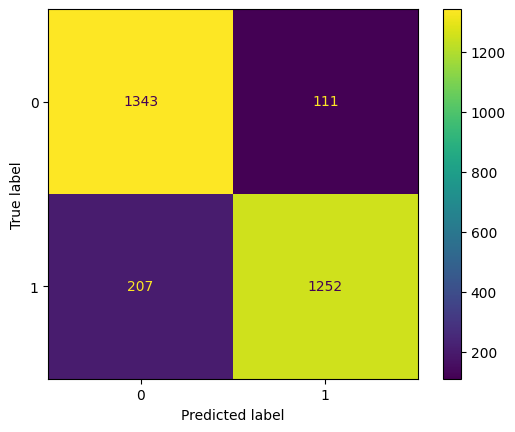

In [29]:
y_pred = clf_xgb.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [30]:
print(classification_report(y_train, clf_xgb.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5818
           1       1.00      1.00      1.00      5831

    accuracy                           1.00     11649
   macro avg       1.00      1.00      1.00     11649
weighted avg       1.00      1.00      1.00     11649



In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1454
           1       0.92      0.86      0.89      1459

    accuracy                           0.89      2913
   macro avg       0.89      0.89      0.89      2913
weighted avg       0.89      0.89      0.89      2913



# Hyperparameter Tuning - Optuna


https://medium.com/optuna/using-optuna-to-optimize-xgboost-hyperparameters-63bfcdfd3407


## Objective Function for Optuna - XGBoost

In [32]:
import xgboost as xgb

In [33]:
def objective(trial):
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    param = {
        'n_estimators'      : trial.suggest_int('n_estimators', 50, 500),
        'max_depth'         : trial.suggest_int('max_depth', 50, 500),
        'learning_rate'     : trial.suggest_float('learning_rate', 0.001, 1),
        'verbosity'         : 1,
        'random_state'      : 42,
        'extra_trees'       : True,
        "objective"         : "binary:logistic",
        "eval_metric"       : "auc",
        "booster"           : trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda"            : trial.suggest_float("lambda", 1e-8, 1.0),
        "alpha"             : trial.suggest_float("alpha", 1e-8, 1.0),
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0)

    # Add a callback for pruning.
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-auc")
    bst = xgb.train(param, dtrain, evals=[(dtest, "validation")], callbacks=[pruning_callback])
    preds = bst.predict(dtest)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(y_test, pred_labels)
    return accuracy

## Run Optuna

In [34]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=1000)

[I 2023-04-04 23:10:29,246] A new study created in memory with name: no-name-343576c2-128d-45d4-ab56-325387843035


[23:10:29] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.50000
[1]	validation-auc:0.50000
[2]	validation-auc:0.50000
[3]	validation-auc:0.50000
[4]	validation-auc:0.50000
[5]	validation-auc:0.50000
[6]	validation-auc:0.50000
[7]	validation-auc:0.50000
[8]	validation-auc:0.50000
[9]	validation-auc:0.50000


[I 2023-04-04 23:10:30,642] Trial 0 finished with value: 0.5008582217645039 and parameters: {'n_estimators': 418, 'max_depth': 412, 'learning_rate': 0.5451000749568891, 'booster': 'gblinear', 'lambda': 0.3299583887590743, 'alpha': 0.8886679356852479}. Best is trial 0 with value: 0.5008582217645039.


[23:10:31] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89367
[1]	validation-auc:0.90450
[2]	validation-auc:0.91112
[3]	validation-auc:0.91940
[4]	validation-auc:0.92495
[5]	validation-auc:0.92762
[6]	validation-auc:0.92893
[7]	validation-auc:0.93032
[8]	validation-auc:0.93151
[9]	validation-auc:0.93178


[I 2023-04-04 23:10:56,361] Trial 1 finished with value: 0.870236869207003 and parameters: {'n_estimators': 96, 'max_depth': 185, 'learning_rate': 0.7258195000046334, 'booster': 'gbtree', 'lambda': 0.19320103337377592, 'alpha': 0.8304458848762206, 'eta': 0.3841002726757665, 'gamma': 0.9190822402866147, 'grow_policy': 'lossguide'}. Best is trial 1 with value: 0.870236869207003.


[23:10:56] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89766
[1]	validation-auc:0.90987
[2]	validation-auc:0.92143
[3]	validation-auc:0.92662
[4]	validation-auc:0.93002
[5]	validation-auc:0.93397
[6]	validation-auc:0.93680
[7]	validation-auc:0.93866
[8]	validation-auc:0.93891
[9]	validation-auc:0.94005


[I 2023-04-04 23:11:25,018] Trial 2 finished with value: 0.8781325094404394 and parameters: {'n_estimators': 60, 'max_depth': 391, 'learning_rate': 0.3640650832516342, 'booster': 'gbtree', 'lambda': 0.9876860682141181, 'alpha': 0.0701117022258982, 'eta': 0.7242714842791977, 'gamma': 0.7497483169411316, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8781325094404394.


[23:11:25] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.88694
[1]	validation-auc:0.89984
[2]	validation-auc:0.91192
[3]	validation-auc:0.91984
[4]	validation-auc:0.92444
[5]	validation-auc:0.92786
[6]	validation-auc:0.93111
[7]	validation-auc:0.93300
[8]	validation-auc:0.93323
[9]	validation-auc:0.93425


[I 2023-04-04 23:11:47,739] Trial 3 finished with value: 0.8712667353244078 and parameters: {'n_estimators': 162, 'max_depth': 166, 'learning_rate': 0.6514874459254313, 'booster': 'gbtree', 'lambda': 0.9092474382761448, 'alpha': 0.32846913437396014, 'eta': 0.28719723342942816, 'gamma': 0.83053546767756, 'grow_policy': 'lossguide'}. Best is trial 2 with value: 0.8781325094404394.


[23:11:48] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.50000
[1]	validation-auc:0.50000
[2]	validation-auc:0.50000
[3]	validation-auc:0.50000
[4]	validation-auc:0.50000
[5]	validation-auc:0.50000
[6]	validation-auc:0.50000
[7]	validation-auc:0.50000
[8]	validation-auc:0.50000
[9]	validation-auc:0.50000


[I 2023-04-04 23:11:49,041] Trial 4 finished with value: 0.5008582217645039 and parameters: {'n_estimators': 337, 'max_depth': 165, 'learning_rate': 0.9293507113109591, 'booster': 'gblinear', 'lambda': 0.5837392617406738, 'alpha': 0.695608552516889}. Best is trial 2 with value: 0.8781325094404394.


[23:11:49] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.88763
[1]	validation-auc:0.88763


[I 2023-04-04 23:11:58,534] Trial 5 pruned. Trial was pruned at iteration 1.


[23:11:59] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89248
[1]	validation-auc:0.90962
[2]	validation-auc:0.91813
[3]	validation-auc:0.92442
[4]	validation-auc:0.92831
[5]	validation-auc:0.93065
[6]	validation-auc:0.93365
[7]	validation-auc:0.93617
[8]	validation-auc:0.93823
[9]	validation-auc:0.93891


[I 2023-04-04 23:12:30,458] Trial 6 finished with value: 0.874356333676622 and parameters: {'n_estimators': 297, 'max_depth': 486, 'learning_rate': 0.30252817920499847, 'booster': 'gbtree', 'lambda': 0.5838294194619953, 'alpha': 0.3521783893997074, 'eta': 0.7881778377118598, 'gamma': 0.8852745782092453, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8781325094404394.


[23:12:30] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 23:12:35,086] Trial 7 pruned. Trial was pruned at iteration 0.


[23:12:35] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.50000


[I 2023-04-04 23:12:36,231] Trial 8 pruned. Trial was pruned at iteration 0.


[23:12:36] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89718
[1]	validation-auc:0.90613
[2]	validation-auc:0.91429
[3]	validation-auc:0.92073
[4]	validation-auc:0.92600
[5]	validation-auc:0.92838
[6]	validation-auc:0.93056
[7]	validation-auc:0.93252
[8]	validation-auc:0.93416
[9]	validation-auc:0.93516


[I 2023-04-04 23:13:02,969] Trial 9 finished with value: 0.8705801579128046 and parameters: {'n_estimators': 485, 'max_depth': 108, 'learning_rate': 0.4680872476056893, 'booster': 'gbtree', 'lambda': 0.8070307713495921, 'alpha': 0.2567886194549511, 'eta': 0.09881102069157352, 'gamma': 0.56074864594929, 'grow_policy': 'lossguide'}. Best is trial 2 with value: 0.8781325094404394.


[23:13:03] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.90538
[1]	validation-auc:0.90220


[I 2023-04-04 23:13:15,182] Trial 10 pruned. Trial was pruned at iteration 2.


[23:13:15] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89494
[1]	validation-auc:0.91070
[2]	validation-auc:0.91624
[3]	validation-auc:0.92118
[4]	validation-auc:0.92742
[5]	validation-auc:0.93099
[6]	validation-auc:0.93366
[7]	validation-auc:0.93645
[8]	validation-auc:0.93760
[9]	validation-auc:0.93931


[I 2023-04-04 23:13:45,802] Trial 11 finished with value: 0.8726398901476141 and parameters: {'n_estimators': 271, 'max_depth': 485, 'learning_rate': 0.27836433696743, 'booster': 'gbtree', 'lambda': 0.6277110197417113, 'alpha': 2.013279824697456e-05, 'eta': 0.8236339684484354, 'gamma': 0.9931352742263081, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8781325094404394.


[23:13:46] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 23:13:51,537] Trial 12 pruned. Trial was pruned at iteration 0.


[23:13:52] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89277


[I 2023-04-04 23:13:57,847] Trial 13 pruned. Trial was pruned at iteration 0.


[23:13:58] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89588


[I 2023-04-04 23:14:09,768] Trial 14 pruned. Trial was pruned at iteration 1.


[23:14:10] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89351
[1]	validation-auc:0.90761
[2]	validation-auc:0.91530
[3]	validation-auc:0.92230
[4]	validation-auc:0.92836
[5]	validation-auc:0.93257
[6]	validation-auc:0.93451
[7]	validation-auc:0.93032
[8]	validation-auc:0.93334
[9]	validation-auc:0.93582


[I 2023-04-04 23:14:44,286] Trial 15 finished with value: 0.870236869207003 and parameters: {'n_estimators': 335, 'max_depth': 450, 'learning_rate': 0.38232086268774446, 'booster': 'dart', 'lambda': 0.7448819585064357, 'alpha': 0.1674913540112548, 'eta': 0.71325233352668, 'gamma': 0.8044815072379333, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.9112065834350858, 'skip_drop': 0.9585408535110238}. Best is trial 2 with value: 0.8781325094404394.


[23:14:44] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 23:14:51,247] Trial 16 pruned. Trial was pruned at iteration 0.


[23:14:52] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89573
[1]	validation-auc:0.91266
[2]	validation-auc:0.91746
[3]	validation-auc:0.92223
[4]	validation-auc:0.92926
[5]	validation-auc:0.93028
[6]	validation-auc:0.93302
[7]	validation-auc:0.93521
[8]	validation-auc:0.93833
[9]	validation-auc:0.93884


[I 2023-04-04 23:15:20,509] Trial 17 finished with value: 0.8798489529694473 and parameters: {'n_estimators': 203, 'max_depth': 500, 'learning_rate': 0.3473858423258842, 'booster': 'gbtree', 'lambda': 0.7086704188170093, 'alpha': 0.11746452288437197, 'eta': 0.8798281227785548, 'gamma': 0.3568771024519092, 'grow_policy': 'depthwise'}. Best is trial 17 with value: 0.8798489529694473.


[23:15:21] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 23:15:26,858] Trial 18 pruned. Trial was pruned at iteration 0.


[23:15:27] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.89584


[I 2023-04-04 23:15:27,822] Trial 19 pruned. Trial was pruned at iteration 1.


[23:15:28] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89387


[I 2023-04-04 23:15:39,405] Trial 20 pruned. Trial was pruned at iteration 1.


[23:15:39] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89249


[I 2023-04-04 23:15:45,824] Trial 21 pruned. Trial was pruned at iteration 0.


[23:15:46] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89735


[I 2023-04-04 23:15:55,277] Trial 22 pruned. Trial was pruned at iteration 1.


[23:15:55] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89576
[1]	validation-auc:0.90320


[I 2023-04-04 23:16:07,001] Trial 23 pruned. Trial was pruned at iteration 1.


[23:16:07] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89567
[1]	validation-auc:0.90605


[I 2023-04-04 23:16:16,448] Trial 24 pruned. Trial was pruned at iteration 1.


[23:16:17] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89309


[I 2023-04-04 23:16:22,267] Trial 25 pruned. Trial was pruned at iteration 0.


[23:16:22] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 23:16:27,161] Trial 26 pruned. Trial was pruned at iteration 0.


[23:16:27] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.88439


[I 2023-04-04 23:16:33,252] Trial 27 pruned. Trial was pruned at iteration 0.


[23:16:33] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89001


[I 2023-04-04 23:16:39,679] Trial 28 pruned. Trial was pruned at iteration 0.


[23:16:40] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.



[I 2023-04-04 23:16:40,608] Trial 29 pruned. Trial was pruned at iteration 0.


[23:16:41] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.



[I 2023-04-04 23:16:41,529] Trial 30 pruned. Trial was pruned at iteration 0.


[23:16:42] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89766
[1]	validation-auc:0.91013
[2]	validation-auc:0.91782
[3]	validation-auc:0.92655
[4]	validation-auc:0.93222
[5]	validation-auc:0.93383
[6]	validation-auc:0.93588
[7]	validation-auc:0.93758
[8]	validation-auc:0.93780
[9]	validation-auc:0.94009


[I 2023-04-04 23:17:10,550] Trial 31 finished with value: 0.8791623755578442 and parameters: {'n_estimators': 264, 'max_depth': 483, 'learning_rate': 0.3328815567307362, 'booster': 'gbtree', 'lambda': 0.6565088212013905, 'alpha': 0.012933427710998549, 'eta': 0.8397221377458937, 'gamma': 0.9855198722531101, 'grow_policy': 'depthwise'}. Best is trial 17 with value: 0.8798489529694473.


[23:17:11] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89746
[1]	validation-auc:0.90861
[2]	validation-auc:0.91529


[I 2023-04-04 23:17:24,434] Trial 32 pruned. Trial was pruned at iteration 2.


[23:17:24] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 23:17:29,550] Trial 33 pruned. Trial was pruned at iteration 0.


[23:17:30] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89664
[1]	validation-auc:0.90489


[I 2023-04-04 23:17:39,245] Trial 34 pruned. Trial was pruned at iteration 1.


[23:17:39] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89688
[1]	validation-auc:0.90797
[2]	validation-auc:0.91906
[3]	validation-auc:0.92555
[4]	validation-auc:0.93101
[5]	validation-auc:0.93376
[6]	validation-auc:0.93705
[7]	validation-auc:0.94003
[8]	validation-auc:0.94136
[9]	validation-auc:0.94148


[I 2023-04-04 23:18:08,564] Trial 35 finished with value: 0.8795056642636457 and parameters: {'n_estimators': 164, 'max_depth': 428, 'learning_rate': 0.35723936707149656, 'booster': 'gbtree', 'lambda': 0.7683002003184369, 'alpha': 0.04488601054606495, 'eta': 0.93283459522292, 'gamma': 0.9885024022523675, 'grow_policy': 'depthwise'}. Best is trial 17 with value: 0.8798489529694473.


[23:18:09] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89501
[1]	validation-auc:0.91179
[2]	validation-auc:0.91950
[3]	validation-auc:0.92373
[4]	validation-auc:0.92984
[5]	validation-auc:0.93169
[6]	validation-auc:0.93455
[7]	validation-auc:0.93607
[8]	validation-auc:0.93686
[9]	validation-auc:0.93752


[I 2023-04-04 23:18:35,831] Trial 36 finished with value: 0.8777892207346378 and parameters: {'n_estimators': 171, 'max_depth': 431, 'learning_rate': 0.5802194929379895, 'booster': 'gbtree', 'lambda': 0.7589289475405158, 'alpha': 0.0035390976686042394, 'eta': 0.9407773238274557, 'gamma': 0.9835542891555217, 'grow_policy': 'lossguide'}. Best is trial 17 with value: 0.8798489529694473.


[23:18:36] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89503
[1]	validation-auc:0.90957
[2]	validation-auc:0.91897
[3]	validation-auc:0.92474
[4]	validation-auc:0.92870
[5]	validation-auc:0.93159
[6]	validation-auc:0.93265


[I 2023-04-04 23:18:58,434] Trial 37 pruned. Trial was pruned at iteration 6.


[23:18:58] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89344


[I 2023-04-04 23:19:06,492] Trial 38 pruned. Trial was pruned at iteration 0.


[23:19:07] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.89612


[I 2023-04-04 23:19:07,452] Trial 39 pruned. Trial was pruned at iteration 1.


[23:19:08] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89795
[1]	validation-auc:0.90958
[2]	validation-auc:0.91836
[3]	validation-auc:0.92596
[4]	validation-auc:0.93050
[5]	validation-auc:0.93459
[6]	validation-auc:0.93647
[7]	validation-auc:0.93808
[8]	validation-auc:0.94017
[9]	validation-auc:0.94064


[I 2023-04-04 23:19:37,127] Trial 40 finished with value: 0.88259526261586 and parameters: {'n_estimators': 81, 'max_depth': 287, 'learning_rate': 0.3491838107998255, 'booster': 'gbtree', 'lambda': 0.9167625640775877, 'alpha': 0.05477693729517126, 'eta': 0.7318011144393137, 'gamma': 0.7707785070774437, 'grow_policy': 'depthwise'}. Best is trial 40 with value: 0.88259526261586.


[23:19:37] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89795
[1]	validation-auc:0.90958
[2]	validation-auc:0.91829
[3]	validation-auc:0.92531
[4]	validation-auc:0.92958
[5]	validation-auc:0.93150
[6]	validation-auc:0.93433
[7]	validation-auc:0.93601
[8]	validation-auc:0.93718


[I 2023-04-04 23:20:05,788] Trial 41 pruned. Trial was pruned at iteration 8.


[23:20:06] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89782
[1]	validation-auc:0.90638


[I 2023-04-04 23:20:15,282] Trial 42 pruned. Trial was pruned at iteration 1.


[23:20:15] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89617
[1]	validation-auc:0.90846


[I 2023-04-04 23:20:26,429] Trial 43 pruned. Trial was pruned at iteration 1.


[23:20:27] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89570
[1]	validation-auc:0.90746


[I 2023-04-04 23:20:38,009] Trial 44 pruned. Trial was pruned at iteration 1.


[23:20:38] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89740
[1]	validation-auc:0.91149
[2]	validation-auc:0.91792
[3]	validation-auc:0.92449
[4]	validation-auc:0.92809


[I 2023-04-04 23:20:57,898] Trial 45 pruned. Trial was pruned at iteration 4.


[23:20:58] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89097


[I 2023-04-04 23:21:05,773] Trial 46 pruned. Trial was pruned at iteration 0.


[23:21:06] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89823


[I 2023-04-04 23:21:15,283] Trial 47 pruned. Trial was pruned at iteration 1.


[23:21:15] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89733
[1]	validation-auc:0.91078
[2]	validation-auc:0.91705


[I 2023-04-04 23:21:35,228] Trial 48 pruned. Trial was pruned at iteration 3.


[23:21:35] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89524


[I 2023-04-04 23:21:44,282] Trial 49 pruned. Trial was pruned at iteration 1.


[23:21:44] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.50000


[I 2023-04-04 23:21:45,291] Trial 50 pruned. Trial was pruned at iteration 0.


[23:21:45] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89817


[I 2023-04-04 23:21:56,165] Trial 51 pruned. Trial was pruned at iteration 1.


[23:21:56] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89504


[I 2023-04-04 23:22:07,044] Trial 52 pruned. Trial was pruned at iteration 1.


[23:22:07] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89670
[1]	validation-auc:0.90516


[I 2023-04-04 23:22:16,953] Trial 53 pruned. Trial was pruned at iteration 1.


[23:22:17] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89827
[1]	validation-auc:0.90616


[I 2023-04-04 23:22:27,029] Trial 54 pruned. Trial was pruned at iteration 1.


[23:22:27] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89605
[1]	validation-auc:0.91072
[2]	validation-auc:0.91844
[3]	validation-auc:0.92533
[4]	validation-auc:0.92901
[5]	validation-auc:0.93122
[6]	validation-auc:0.93403
[7]	validation-auc:0.93514


[I 2023-04-04 23:22:52,990] Trial 55 pruned. Trial was pruned at iteration 7.


[23:22:53] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89815
[1]	validation-auc:0.91272
[2]	validation-auc:0.92297
[3]	validation-auc:0.93040
[4]	validation-auc:0.93485
[5]	validation-auc:0.93661
[6]	validation-auc:0.93823
[7]	validation-auc:0.93973
[8]	validation-auc:0.94049
[9]	validation-auc:0.94027


[I 2023-04-04 23:23:19,460] Trial 56 finished with value: 0.8729831788534157 and parameters: {'n_estimators': 204, 'max_depth': 384, 'learning_rate': 0.5787905709283062, 'booster': 'gbtree', 'lambda': 0.7313329785328916, 'alpha': 0.036682098349853066, 'eta': 0.9616794404754647, 'gamma': 0.8689655852907409, 'grow_policy': 'depthwise'}. Best is trial 40 with value: 0.88259526261586.


[23:23:20] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89568


[I 2023-04-04 23:23:29,384] Trial 57 pruned. Trial was pruned at iteration 1.


[23:23:29] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89449


[I 2023-04-04 23:23:37,045] Trial 58 pruned. Trial was pruned at iteration 0.


[23:23:37] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89703
[1]	validation-auc:0.89703


[I 2023-04-04 23:23:49,668] Trial 59 pruned. Trial was pruned at iteration 1.


[23:23:50] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89292


[I 2023-04-04 23:23:55,766] Trial 60 pruned. Trial was pruned at iteration 0.


[23:23:56] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89766
[1]	validation-auc:0.90947


[I 2023-04-04 23:24:05,805] Trial 61 pruned. Trial was pruned at iteration 1.


[23:24:06] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89303


[I 2023-04-04 23:24:12,069] Trial 62 pruned. Trial was pruned at iteration 0.


[23:24:12] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89621
[1]	validation-auc:0.90814


[I 2023-04-04 23:24:23,153] Trial 63 pruned. Trial was pruned at iteration 1.


[23:24:23] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89664
[1]	validation-auc:0.90699


[I 2023-04-04 23:24:34,172] Trial 64 pruned. Trial was pruned at iteration 1.


[23:24:34] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89668


[I 2023-04-04 23:24:42,652] Trial 65 pruned. Trial was pruned at iteration 1.


[23:24:43] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89610


[I 2023-04-04 23:24:52,994] Trial 66 pruned. Trial was pruned at iteration 1.


[23:24:53] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.50000


[I 2023-04-04 23:24:53,946] Trial 67 pruned. Trial was pruned at iteration 0.


[23:24:54] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89547
[1]	validation-auc:0.90754


[I 2023-04-04 23:25:05,274] Trial 68 pruned. Trial was pruned at iteration 1.


[23:25:05] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 23:25:10,387] Trial 69 pruned. Trial was pruned at iteration 0.


[23:25:11] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89675


[I 2023-04-04 23:25:22,039] Trial 70 pruned. Trial was pruned at iteration 1.


[23:25:22] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89815
[1]	validation-auc:0.90722


[I 2023-04-04 23:25:32,077] Trial 71 pruned. Trial was pruned at iteration 1.


[23:25:32] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89565


[I 2023-04-04 23:25:42,252] Trial 72 pruned. Trial was pruned at iteration 1.


[23:25:42] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 23:25:50,238] Trial 73 pruned. Trial was pruned at iteration 0.


[23:25:50] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89515
[1]	validation-auc:0.90782


[I 2023-04-04 23:26:01,566] Trial 74 pruned. Trial was pruned at iteration 1.


[23:26:02] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89848


[I 2023-04-04 23:26:11,412] Trial 75 pruned. Trial was pruned at iteration 1.


[23:26:12] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89503
[1]	validation-auc:0.90892


[I 2023-04-04 23:26:23,241] Trial 76 pruned. Trial was pruned at iteration 1.


[23:26:23] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89546


[I 2023-04-04 23:26:34,224] Trial 77 pruned. Trial was pruned at iteration 1.


[23:26:34] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.89761
[1]	validation-auc:0.89874


[I 2023-04-04 23:26:35,212] Trial 78 pruned. Trial was pruned at iteration 1.


[23:26:35] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89739
[1]	validation-auc:0.90909


[I 2023-04-04 23:26:46,590] Trial 79 pruned. Trial was pruned at iteration 1.


[23:26:47] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89772
[1]	validation-auc:0.90763


[I 2023-04-04 23:26:55,089] Trial 80 pruned. Trial was pruned at iteration 1.


[23:26:55] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.89766
[1]	validation-auc:0.90968
[2]	validation-auc:0.91730


[I 2023-04-04 23:27:09,377] Trial 81 pruned. Trial was pruned at iteration 2.


## Best XGBoster Model from Optuna

In [35]:
study.best_params

{'n_estimators': 81,
 'max_depth': 287,
 'learning_rate': 0.3491838107998255,
 'booster': 'gbtree',
 'lambda': 0.9167625640775877,
 'alpha': 0.05477693729517126,
 'eta': 0.7318011144393137,
 'gamma': 0.7707785070774437,
 'grow_policy': 'depthwise'}

In [36]:
clf_xgb_opt= XGBClassifier(**study.best_params)

In [37]:
clf_xgb_opt.fit(X_train, y_train)

XGBClassifier(alpha=0.05477693729517126, base_score=None, booster='gbtree',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.7318011144393137,
              eval_metric=None, feature_types=None, gamma=0.7707785070774437,
              gpu_id=None, grow_policy='depthwise', importance_type=None,
              interaction_constraints=None, lambda=0.9167625640775877,
              learning_rate=0.3491838107998255, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=287, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=81, n_jobs=None, ...)

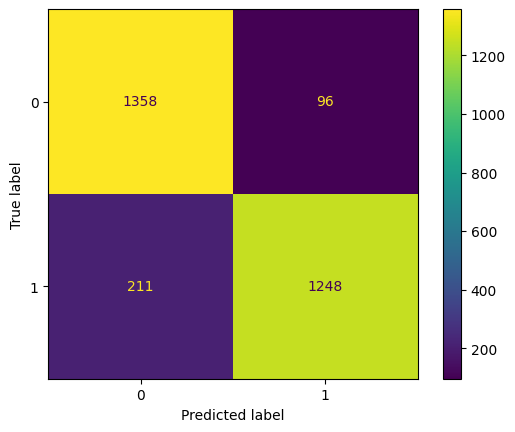

In [38]:
y_pred = clf_xgb_opt.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [39]:
print(classification_report(y_train, clf_xgb.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5818
           1       1.00      1.00      1.00      5831

    accuracy                           1.00     11649
   macro avg       1.00      1.00      1.00     11649
weighted avg       1.00      1.00      1.00     11649



In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1454
           1       0.93      0.86      0.89      1459

    accuracy                           0.89      2913
   macro avg       0.90      0.89      0.89      2913
weighted avg       0.90      0.89      0.89      2913



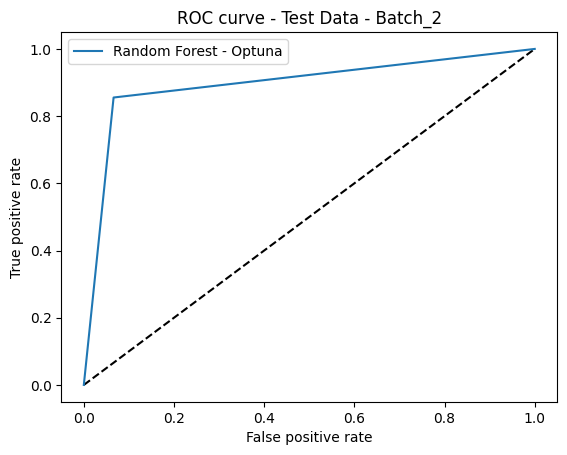

In [41]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, clf_xgb_opt.predict(X_test))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest - Optuna')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Test Data - Batch_2')
plt.legend(loc='best')
plt.show()